## Obtain news article

In [ ]:
%pip install -r requirements.txt 

In [2]:
from joblib import Parallel, delayed
import joblib
import nltk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import defaultdict,Counter
import re
from nltk.stem import WordNetLemmatizer,PorterStemmer


In [ ]:
nltk.download('stopwords')

stop=set(stopwords.words('english'))

In [4]:
# Import packages
# Default packages
import time
import csv
import os
import json


# Preinstalled packages
import requests
import pandas as pd

# URL of our News API
base_url = 'https://api.newscatcherapi.com/v2/search?lang=en'

# Your API key
X_API_KEY = 'YHBKmAH0DbzXSs_h7be46br_kfw3EhBcqXPtCTSg1Qc'

In [5]:
# Put your API key to headers in order to be authorized to perform a call
headers = {'x-api-key': X_API_KEY}
# Define your desired parameters
# params = [
#     {
#         'q': 'Bitcoin',
#         'lang': 'en',
#         'to_rank': 10000,
#         'topic': "business",
#         'page_size': 100,
#         'page': 1,
#         'from' : "2015/01/01",
#         'to': "2019/12/31"
#     }
# ]

params = [
    {
        'q': 'Bitcoin',
        'lang': 'en',
        'to_rank': 10000,
        'topic': "business",
        'page_size': 100,
        'page': 1
    }
]



In [6]:
# Variable to store all found news articles, mp stands for "multiple queries"
all_news_articles_mp = []

# Infinite loop which ends when all articles are extracted
for separated_param in params:

    print(f'Query in use => {str(separated_param)}')
    
    while True:
        # Wait for 1 second between each call
        time.sleep(1)

        # GET Call from previous section enriched with some logs
        response = requests.get(base_url, headers=headers, params=separated_param)
        results = json.loads(response.text.encode())
        if response.status_code == 200:
            print(f'Done for page number => {separated_param["page"]}')


            # Adding your parameters to each result to be able to explore afterwards
            for i in results['articles']:
                i['used_params'] = str(separated_param)


            # Storing all found articles
            all_news_articles_mp.extend(results['articles'])

            # Ensuring to cover all pages by incrementing "page" value at each iteration
            separated_param['page'] += 1
            if separated_param['page'] > results['total_pages']:
                print("All articles have been extracted")
                break
            else:
                print(f'Proceed extracting page number => {separated_param["page"]}')
        else:
            print(results)
            print(f'ERROR: API call failed for page number => {separated_param["page"]}')
            break

Query in use => {'q': 'Bitcoin', 'lang': 'en', 'to_rank': 10000, 'topic': 'business', 'page_size': 100, 'page': 1}
Done for page number => 1
Proceed extracting page number => 2
Done for page number => 2
All articles have been extracted


In [7]:
print(f'Number of extracted articles => {str(len(all_news_articles_mp))}')

Number of extracted articles => 104


In [8]:
# Define variables
unique_ids = []
all_news_articles = []

# Iterate on each article and check whether we saw this _id before
for article in all_news_articles_mp:
    if article['_id'] not in unique_ids:
        unique_ids.append(article['_id'])
        all_news_articles.append(article)

In [9]:
# Import data into pandas
pandas_table = pd.DataFrame(all_news_articles)

In [11]:
pandas_table.head()

,title,author,published_date,published_date_precision,link,clean_url,excerpt,summary,rights,rank,topic,country,language,authors,media,is_opinion,twitter_account,_score,_id,used_params
0,Bitcoin phone home: Use crypto to buy sim card...,Joe Hall,2023-08-08 12:55:00,full,https://cointelegraph.com/news/bitcoin-crypto-...,cointelegraph.com,A partnership between crypto marketplace Bitre...,A partnership between crypto e-commerce platfo...,cointelegraph.com,1696,business,US,en,Joe Hall,https://images.cointelegraph.com/images/1200_a...,False,@cointelegraph,11.274632,2e408dca78827908b28d0c6263a5d6b9,"{'q': 'Bitcoin', 'lang': 'en', 'to_rank': 1000..."
1,"Speed Launches Magento Plugin, Simplifying Bit...",Jay Patel,2023-08-08 14:00:00,full,https://www.einnews.com/pr_news/647944000/spee...,einnews.com,Speed Launches Magento Plugin: Revolutionizing...,Speed Bitcoin Payment Processor\n\nSpeed Launc...,einnews.com,3825,business,UA,en,"EIN News,Jay Patel",https://img.einnews.com/ampsize/515125/speed-b...,False,@einnews,11.272777,3b068f1da08f78cf0742e1f9e77f2a5e,"{'q': 'Bitcoin', 'lang': 'en', 'to_rank': 1000..."
2,I write about the rapidly evolving VC and star...,Kjartan Rist,2023-08-10 13:31:17,full,https://www.forbes.com/sites/kjartanrist/2023/...,forbes.com,Is bitcoin finally breaking free of its associ...,The hype around the bitcoin price rollercoaste...,Copyright 2023 Forbes Media LLC,49,business,US,en,Kjartan Rist,https://imageio.forbes.com/specials-images/ima...,False,@forbes,11.264276,3c007d57c54e73306f8151687f3dc507,"{'q': 'Bitcoin', 'lang': 'en', 'to_rank': 1000..."
3,The deadline for a ruling on Ark's application...,Bob Pisani,2023-08-07 12:30:00,timezone unknown,https://www.nbcphiladelphia.com/news/business/...,nbcphiladelphia.com,The SEC is required to give a thumbs up or thu...,It's put up or shut up time for the SEC on a b...,nbcphiladelphia.com,4181,business,US,en,"Bob Pisani,Bob Pisani Cnbc,CNBC",https://media.nbcphiladelphia.com/2023/08/1072...,False,@nbcphiladelphia,11.234709,b406883f25fa7ed168ccc79217cdc176,"{'q': 'Bitcoin', 'lang': 'en', 'to_rank': 1000..."
4,Leak Reveals BlackRock's Game-Changing Bitcoin...,Billy Bambrough,2023-08-09 22:45:24,full,https://www.forbes.com/sites/digital-assets/20...,forbes.com,"Bitcoin, ethereum and other cryptocurrencies w...","Bitcoin BTC, ethereum and other cryptocurrenci...",Copyright 2023 Forbes Media LLC,49,business,US,en,"Billy Bambrough,Senior Contributor",https://imageio.forbes.com/specials-images/ima...,False,@billybambrough,11.230986,ec6029fd5cc4a6ffa0ff4e2633d33b21,"{'q': 'Bitcoin', 'lang': 'en', 'to_rank': 1000..."


In [10]:
pandas_table['title'][2]

'I write about the rapidly evolving VC and start-up sector in Europe'

In [11]:
df = pandas_table[['title']]
df.head()

,title
0,Role of Bitcoin in the global financial system
1,SEC Delays Decision on ARK Invest's Bitcoin ET...
2,I write about the rapidly evolving VC and star...
3,"Speed Launches Magento Plugin, Simplifying Bit..."
4,"Bitcoin Trends To Watch In 2023: Nostr, Ordina..."


In [12]:
df.shape

(104, 1)

In [14]:
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (104, 1)


In [15]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
    column name  Total missing  Percent missing
0        title              0              0.0


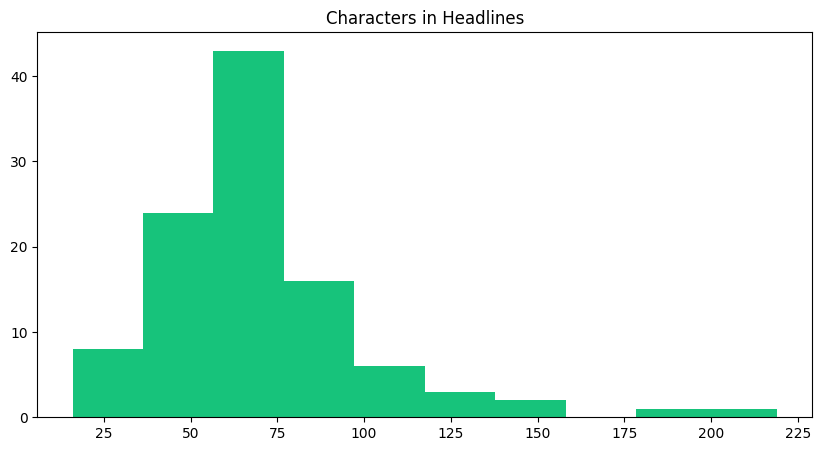

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))

headline_length = pandas_table['title'].str.len()
ax.hist(headline_length, color='#17C37B')
ax.set_title('Characters in Headlines')

plt.show()

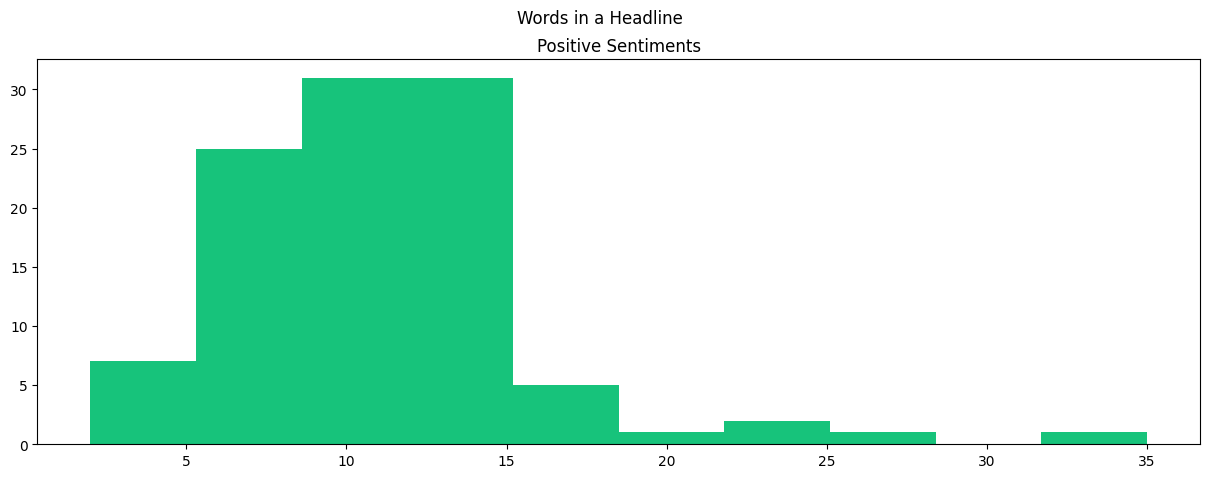

In [17]:
fig,(ax1)=plt.subplots(figsize=(15,5))

headline_length=pandas_table['title'].str.split().map(lambda x: len(x))
ax1.hist(headline_length,color='#17C37B')
ax1.set_title('Positive Sentiments')

fig.suptitle('Words in a Headline')
plt.show()

C:\Users\Computing\AppData\Local\Temp\ipykernel_15284\1251642903.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='#17C37B')


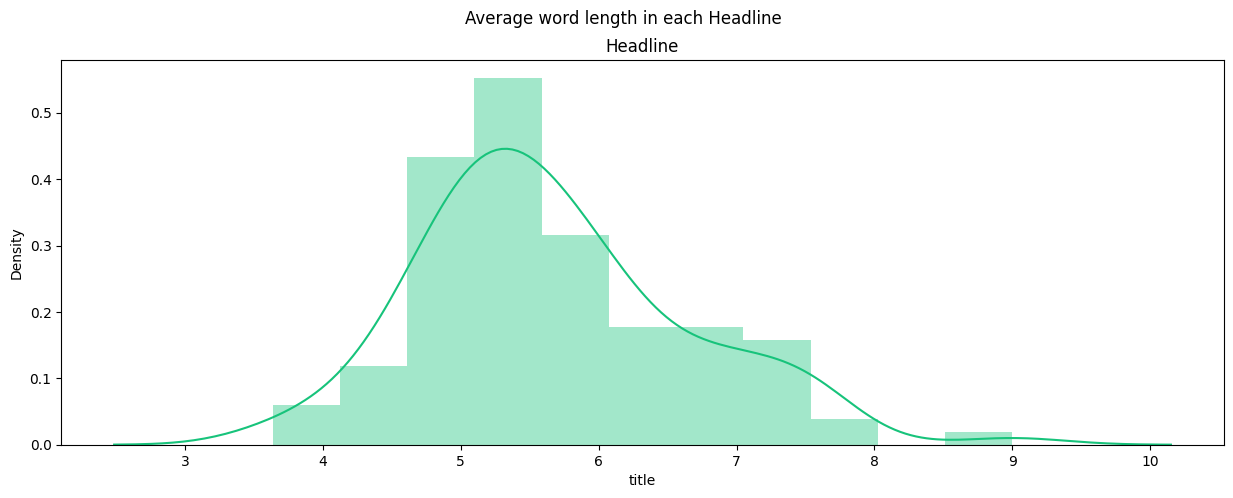

In [18]:
fig,(ax1)=plt.subplots(figsize=(15,5))

word=pandas_table['title'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='#17C37B')
ax1.set_title('Headline')

fig.suptitle('Average word length in each Headline')
plt.show()

In [19]:
def create_corpus(target):
    corpus=[]
    
    for x in pandas_table['title'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
np.array(stop)

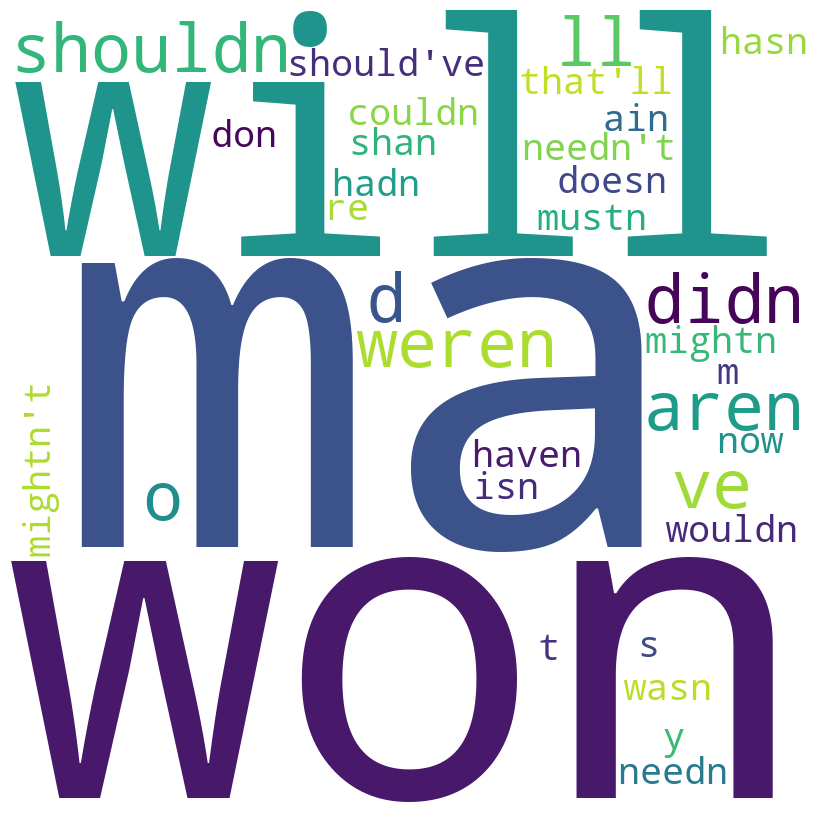

In [20]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  

for val in stop: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<BarContainer object of 10 artists>

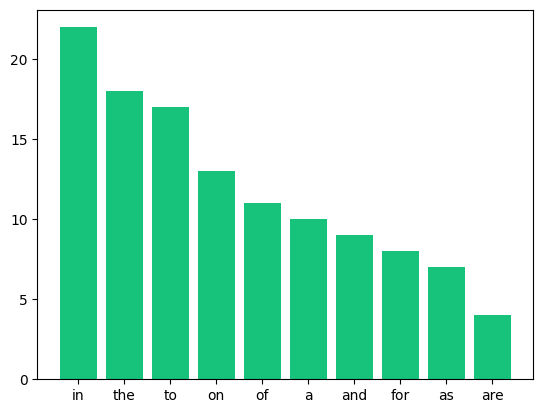

In [21]:
corpus=create_corpus("title")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

<BarContainer object of 1 artists>

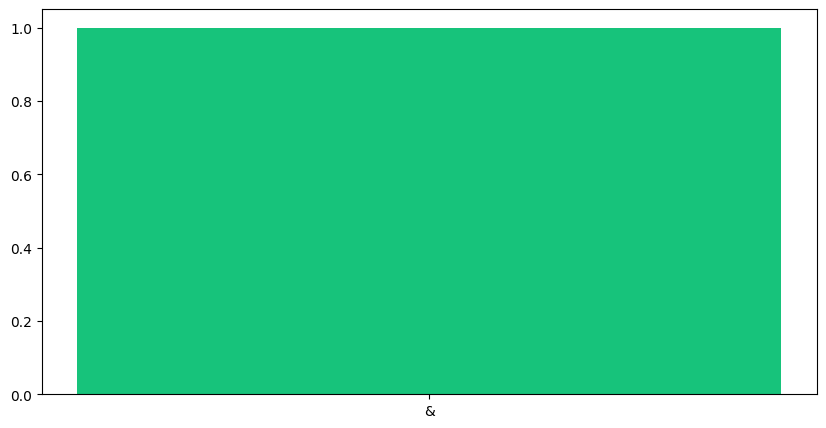

In [22]:
plt.figure(figsize=(10,5))
corpus=create_corpus("title")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

In [23]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<Axes: >

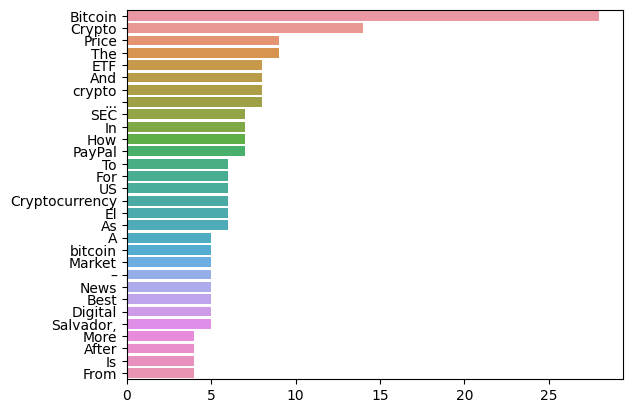

In [24]:
sns.barplot(x=y,y=x)

In [ ]:
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
df['hash']=df['title'].apply(lambda x:find_hash(x))
temp=df['hash'].value_counts()[:][1:11]
df.head()

temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
sns.barplot(x="Hashtag",y="count", data = temp)

In [ ]:
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
df['mentions']=df['title'].apply(lambda x:mentions(x))

temp=df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

sns.barplot(x="Mentions",y="count", data = temp)

In [27]:
#Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
df['title']=df['title'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['title']=df['title'].apply(lambda x:remove_html(x))

C:\Users\Computing\AppData\Local\Temp\ipykernel_15284\20215729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].apply(lambda x:remove_urls(x))
C:\Users\Computing\AppData\Local\Temp\ipykernel_15284\20215729.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].apply(lambda x:remove_html(x))


In [28]:
# Lower casing
def lower(text):
    low_text= text.lower()
    return low_text
df['title']=df['title'].apply(lambda x:lower(x))


# Number removal
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
df['title']=df['title'].apply(lambda x:remove_num(x))

C:\Users\Computing\AppData\Local\Temp\ipykernel_15284\1215840115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].apply(lambda x:lower(x))
C:\Users\Computing\AppData\Local\Temp\ipykernel_15284\1215840115.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].apply(lambda x:remove_num(x))


In [29]:
#Remove stopwords & Punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
df['title']=df['title'].apply(lambda x:punct_remove(x))

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['title']=df['title'].apply(lambda x:remove_stopwords(x))

C:\Users\Computing\AppData\Local\Temp\ipykernel_15284\185697248.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].apply(lambda x:punct_remove(x))
C:\Users\Computing\AppData\Local\Temp\ipykernel_15284\185697248.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].apply(lambda x:remove_stopwords(x))


In [30]:
#Remove mentions and hashtags
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df['title']=df['title'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
df['title']=df['title'].apply(lambda x:remove_hash(x))

C:\Users\Computing\AppData\Local\Temp\ipykernel_15284\426118252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].apply(lambda x:remove_mention(x))
C:\Users\Computing\AppData\Local\Temp\ipykernel_15284\426118252.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].apply(lambda x:remove_hash(x))


In [31]:
#Remove extra white space left while removing stuff
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
def stemming(text):
    ps = PorterStemmer()
    
    return" ".join([ps.stem(word) for word in str(text).split()])
    
def lemmatizing(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    
    return" ".join([wordnet_lemmatizer.lemmatize(word) for word in str(text).split()])
df['title']=df['title'].apply(lambda x:remove_space(x))

C:\Users\Computing\AppData\Local\Temp\ipykernel_15284\3169671107.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].apply(lambda x:remove_space(x))


In [32]:
from collections import Counter
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
split_it = comment_words.split()
Counter = Counter(split_it)
number=20
most_occur = Counter.most_common(number)
most_occur

[('bitcoin', 37),
 ('crypto', 22),
 ('us', 10),
 ('price', 9),
 ('paypal', 9),
 ('etf', 8),
 ('global', 7),
 ('sec', 7),
 ('digital', 7),
 ('stablecoin', 7),
 ('ethereum', 6),
 ('cryptocurrency', 6),
 ('best', 6),
 ('el', 6),
 ('salvador', 6),
 ('social', 6),
 ('media', 6),
 ('press', 6),
 ('free', 6),
 ('payments', 5)]

<Axes: xlabel='Word'>

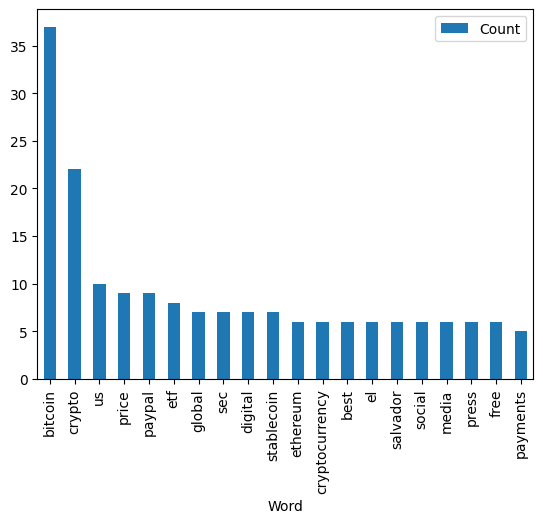

In [33]:
dfm = pd.DataFrame(most_occur, columns = ['Word', 'Count'])
dfm.plot.bar(x='Word',y='Count')

In [34]:
df['title']=df['title'].apply(lambda x:stemming(x))

C:\Users\Computing\AppData\Local\Temp\ipykernel_15284\1483629935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']=df['title'].apply(lambda x:stemming(x))


In [ ]:
fig, ax1 = plt.subplots( figsize=[30, 15])

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

words= []
tokens=comment_words.split()

for x in tokens:
    if x not in comment_words:
        words.append(x)

words=   " ".join(words) 

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);



In [36]:
# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30

In [37]:
df

,title,hash,mentions
0,role bitcoin global financi system,,
1,sec delay decis ark invest bitcoin etf gather ...,,
2,write rapidli evolv vc startup sector europ,,
3,speed launch magento plugin simplifi bitcoin p...,,
4,bitcoin trend watch nostr ordin lightn network...,,
...,...,...,...
99,creat sustain blockchain ecosystem public good...,,
100,best site buy x follow cheap price,,
101,farmskin promo code get free case signup bonus,,
102,financi regul affect investor,,


In [68]:
df.to_csv('extracted_news_articles_processed.csv', encoding='utf-8', sep=',')